In [10]:
# Cerinta 1

import pandas as pd

df = pd.read_csv('files/train.csv')

missing_values = df.isnull().sum()

duplicate_rows = df.duplicated().sum()

print(df.info())
print(f"Numarul de valori lipsa pentru fiecare coloana:\n{missing_values}")
print(f"Numarul de linii duplicate: {duplicate_rows}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Numarul de valori lipsa pentru fiecare coloana:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
C

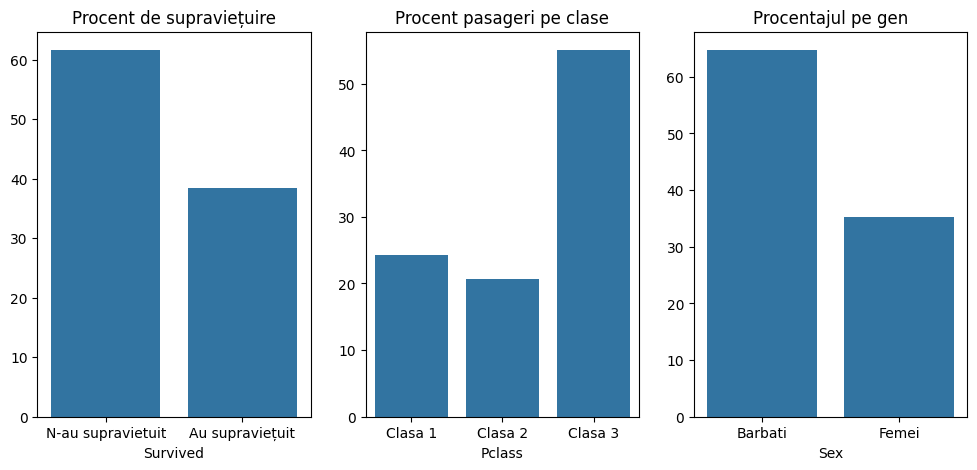

In [11]:
# Cerinta 2

import matplotlib.pyplot as plt
import seaborn as sb
# Pentru cele 3 coloane:
# Ia numarul de valori pentru fiecare posibilitate,
# imparte-le la cate sunt si inmulteste cu o suta

survived = df['Survived']
survival_rate = survived.value_counts(normalize=True) * 100

class_col = df['Pclass']
class_rate = class_col.value_counts(normalize=True) * 100

sex_col = df['Sex']
gender_rate = sex_col.value_counts(normalize=True) * 100

# 3 plot-uri pe un rand
main_plot, subplots = plt.subplots(1, 3, figsize=(12, 5))

# plot supravietuire
subplots[0].set_title('Procent de supraviețuire')
subplots[0].set_xticks([0, 1])
subplots[0].set_xticklabels(['N-au supravietuit', 'Au supraviețuit'])
sb.barplot(x=survival_rate.index, y=survival_rate.values, ax=subplots[0])

# plot pasageri pe clase
subplots[1].set_title('Procent pasageri pe clase')
subplots[1].set_xticks([0, 1, 2])
subplots[1].set_xticklabels(['Clasa 1', 'Clasa 2', 'Clasa 3'])
sb.barplot(x=class_rate.index, y=class_rate.values, ax=subplots[1])

# plot procente pe gen
subplots[2].set_title('Procentajul pe gen')
subplots[2].set_xticks([0, 1])
subplots[2].set_xticklabels(['Barbati', 'Femei'])
sb.barplot(x=gender_rate.index, y=gender_rate.values, ax=subplots[2])

plt.show()

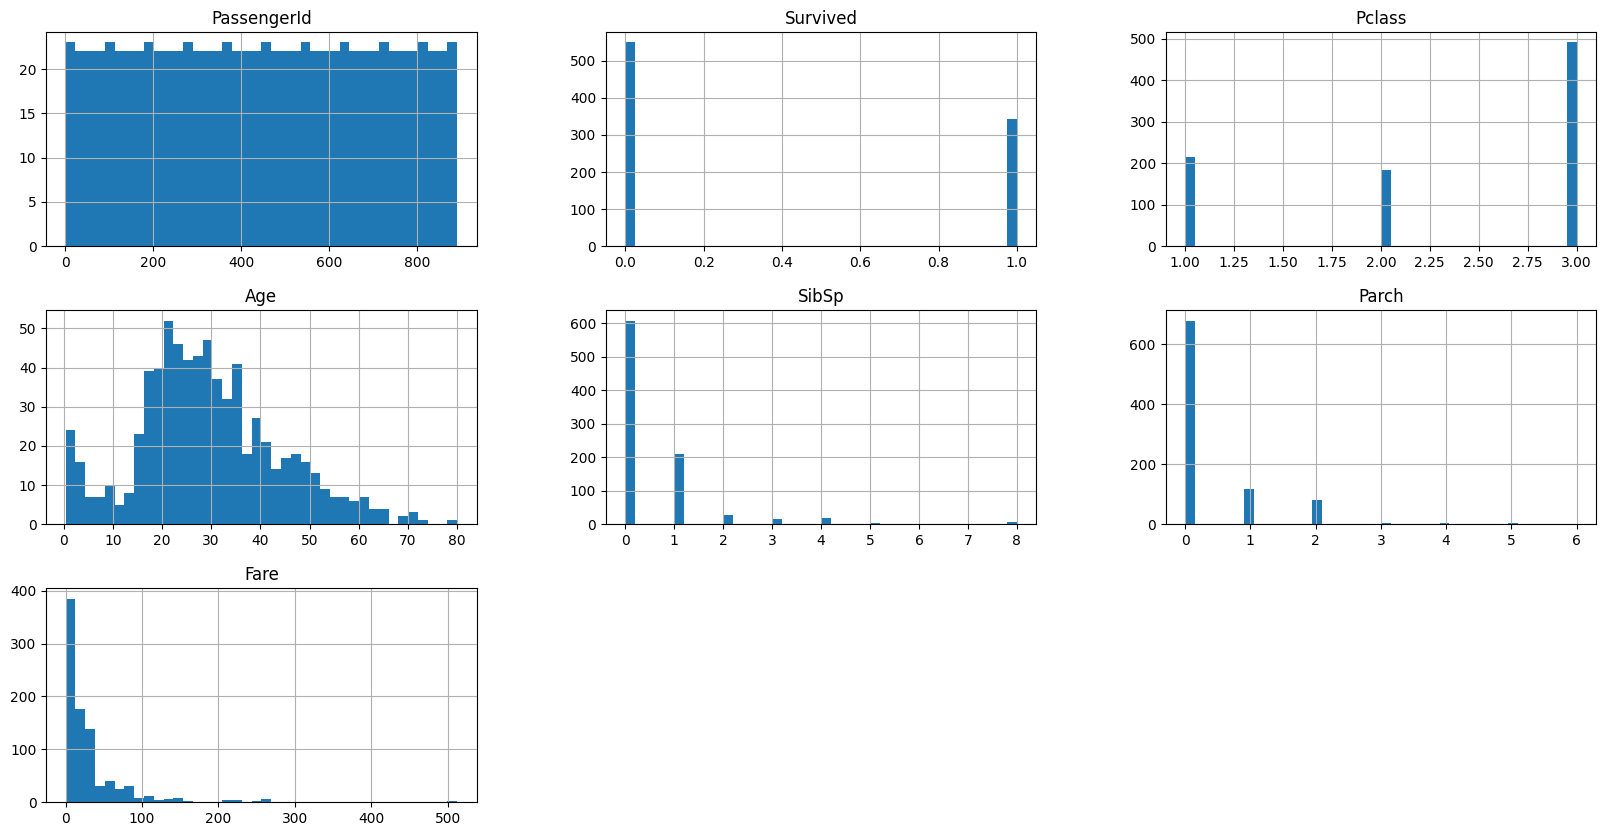

In [14]:
# Cerinta 3

# vector cu coloanele ce au ca tip valori numerice
only_numerical_cols = df.select_dtypes(include=['int64', 'float64'])
name_of_cols = only_numerical_cols.columns
df[name_of_cols].hist(bins=40, figsize=(20, 10))
plt.show()

In [15]:
# Cerinta 4

cols_without_values = missing_values[missing_values > 0]
nr_linii = df.shape[0]
percentages = (cols_without_values / nr_linii) * 100

print(f'Coloanele ce au valori lipsa si cate din acestea sunt:\n{cols_without_values}')

print(f'Procentul acestora din numarul total:\n{percentages}')

Coloanele ce au valori lipsa si cate din acestea sunt:
Age         177
Cabin       687
Embarked      2
dtype: int64
Procentul acestora din numarul total:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64
